**Polynomial Regression**

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np  # For handling numerical data
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression

In [2]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [3]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [4]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
from  sklearn.preprocessing import PolynomialFeatures
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial feature

In [5]:
# Step 4: Create and train the Polynomial Regression model
model = LinearRegression()  # Initializing the model
model.fit(X_poly, Y)  # Training the model

LinearRegression()

In [7]:
# Step 5:Calculate the coefficient and correlation
slope = model.coef_[0] #coefficient(m) (slope) of the regression line
intercept = model.intercept_ #intercept(c) (where the line crosses the Y-axis)
print(f"intercept : {intercept}")
print(f"slope : {slope}")

intercept : 25.834848216909297
slope : 0.0


In [9]:
# Step 6: Display the equation of line
print(f"Equation of the line: Y = {slope:.2f}X + {intercept:.2f}")

Equation of the line: Y = 0.00X + 25.83


In [10]:
# Step 7:predict values using the model
Y_pred = model.predict(X_poly) # predict salaries for the given experience values

***Model Evaluation Metrix***

In [11]:
# 1. Mean Square Error (MSE) - Measures average squared difference b/w actual and predicted value
mse = mean_squared_error(Y,Y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 11.47


In [12]:
# 2. Mean Absolute Error (MAE) - Measures average absolute difference b/w actual and predicted value
mae = mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 2.98


In [13]:
# 3. Root Mean Squared Error (RMSE) - Measures standard deviation of residuals(errors)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 3.39


In [14]:
# 4. R-Squared (R²) - Represents how well the model fits the data (0 to 1 , where 1 represents best)
r2 = r2_score(Y,Y_pred)
print(f"R-Squared (R²): {r2:.2f}")

R-Squared (R²): 0.95


In [16]:
# 5. Adjusted R-Square(R²_adj) - Adjusted for the number of predictors, better for multiple regression
n = len(Y)
p = 1 # Number of independent variables (Experience)
adj_r2 = 1-((1-r2) * (n-1)  / (n-p-1))
print(f"Adjusted R-Square: {adj_r2:.2f}")

Adjusted R-Square: 0.94


In [17]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        13:19:53   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


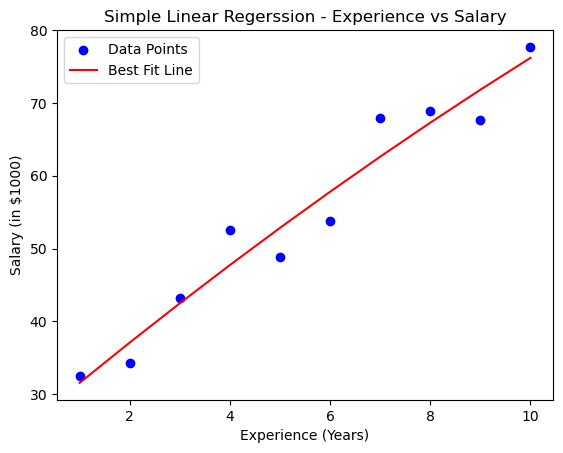

In [18]:
# Step 8: Plot the actual data points
plt.scatter(X,Y, color="blue" ,label="Data Points")  # Scatter plot of actual values

# Step 9: Plot the Regression Line (Best Fit Line)
plt.plot(X,Y_pred, color="red" ,label="Best Fit Line")  # Regression Line

# Step 10: Add labels and Lenged
plt.xlabel("Experience (Years)")
plt.ylabel("Salary (in $1000)")
plt.title("Simple Linear Regerssion - Experience vs Salary")
plt.legend()

# Step 11: Display the graph 
plt.show()

In [ ]:
while True:
    try:
        exp=float(input("Enter the years of Experience:"))
        if exp==-1:
            break;
        experienced_poly = poly.transform(np.array([[exp]]))
        predicted_salary=model.predict(np.array([[experienced_poly]]))[0]
        print(f"Predicted salary for {exp} years of Experience is ${predicted_salary:.2f}K")
    except ValueError:
        print("Please enter a valid number")